In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
# view all columns (enable scrolling)
pd.set_option('display.max_columns',None)

# lowercase column names
df.columns = df.columns.str.lower()

# drop useless columns
df = df.drop(columns=['naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1','naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2'])

# lowercase text values
text_cols = ['gender','income_category', 'attrition_flag','education_level','marital_status','card_category']

for i in text_cols:
    df[i] = df[i].str.lower()


# rename long column names
df = df.rename(columns={'months_inactive_12_mon':'inactive_months','contacts_count_12_mon':'complaints','total_revolving_bal':'revolving_bal','avg_open_to_buy':'avg_credit_remaining','total_amt_chng_q4_q1':'amount_change','total_ct_chng_q4_q1':'count_change'})



In [4]:
df.describe()

,clientnum,customer_age,dependent_count,months_on_book,total_relationship_count,inactive_months,complaints,credit_limit,revolving_bal,avg_credit_remaining,amount_change,total_trans_amt,total_trans_ct,count_change,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [5]:
categorical_columns = ['gender','dependent_count','education_level','marital_status','income_category','card_category']

# Relationship of each column with Churn Rates

# Overall Churn rate - 16.07%

In [6]:
# churn_rate = (no.of churned customers/ total customers)

overall_churn_rate = round(len(df[df['attrition_flag']=='attrited customer'])/len(df)*100,2)
overall_churn_rate

16.07

# Churn rate across age groups

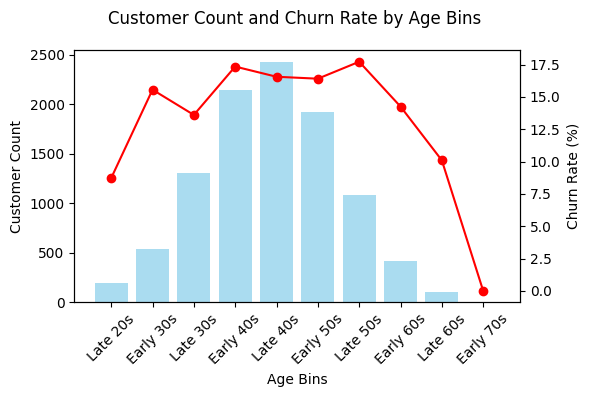

In [7]:
column = 'customer_age'
title = 'Age'


bins = [25,30,35,40,45,50,55,60,65,70,75]
labels = ['Late 20s','Early 30s','Late 30s','Early 40s','Late 40s','Early 50s','Late 50s','Early 60s','Late 60s','Early 70s']
df[f'{column}_bins'] = pd.cut(df[column],bins=bins,labels=labels,right=False)

counts = df[f'{column}_bins'].value_counts().reset_index().sort_values(by=f'{column}_bins')
churn = (df.groupby(f'{column}_bins',observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
churn = churn.merge(counts, on=f'{column}_bins')


fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{column}_bins'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{column}_bins'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title} Bins')
fig.tight_layout()

plt.show()

##### Churn rate is higher for age groups - Early 30s, Early 40s and Late 50s

# Churn rate across Gender

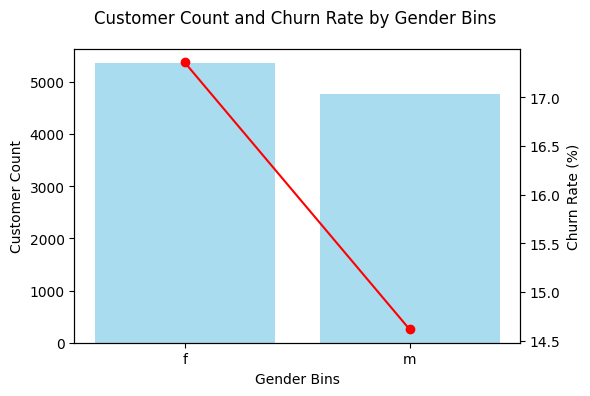

In [8]:
column = 'gender'
title = 'Gender'
group_name = 'gender'


counts = df[f'{group_name}'].value_counts().reset_index().sort_values(by=f'{group_name}')
churn = (df.groupby(f'{group_name}',observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
churn = churn.merge(counts, on=f'{group_name}')


fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
# ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title} Bins')
fig.tight_layout()

plt.show()

# Churn rates across No. of Dependants

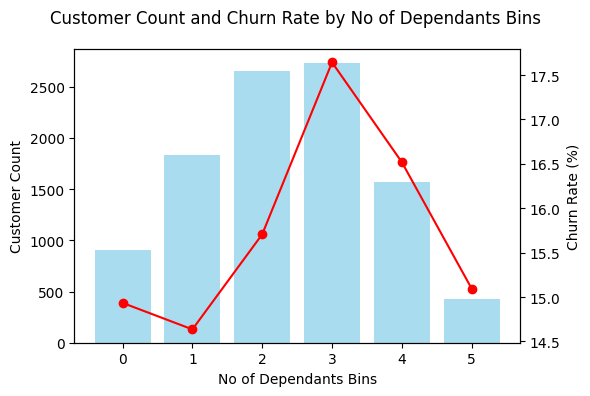

In [9]:
column = 'dependent_count'
title = 'No of Dependants'
group_name = 'dependent_count'


# bins = [25,30,35,40,45,50,55,60,65,70,75]
# labels = ['Late 20s','Early 30s','Late 30s','Early 40s','Late 40s','Early 50s','Late 50s','Early 60s','Late 60s','Early 70s']
# df[f'{column}_bins'] = pd.cut(df[column],bins=bins,labels=labels,right=False)

counts = df[f'{group_name}'].value_counts().reset_index().sort_values(by=f'{group_name}')
churn = (df.groupby(f'{group_name}',observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
churn = churn.merge(counts, on=f'{group_name}')


fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
# ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title} Bins')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Churn rates across Education Levels

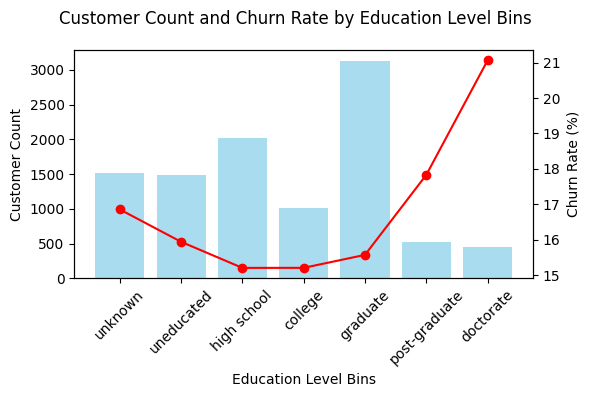

In [10]:
column = 'education_level'
title = 'Education Level'
group_name = 'education_level'


# bins = [25,30,35,40,45,50,55,60,65,70,75]
# labels = ['Late 20s','Early 30s','Late 30s','Early 40s','Late 40s','Early 50s','Late 50s','Early 60s','Late 60s','Early 70s']
# df[f'{column}_bins'] = pd.cut(df[column],bins=bins,labels=labels,right=False)
order = ['unknown','uneducated','high school','college','graduate','post-graduate','doctorate']

churn = (df.groupby(f'{group_name}',observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=column)
counts = df[f'{group_name}'].value_counts().reset_index().sort_values(by=f'{group_name}')
churn = churn.merge(counts, on=f'{group_name}')
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title} Bins')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Marital Status

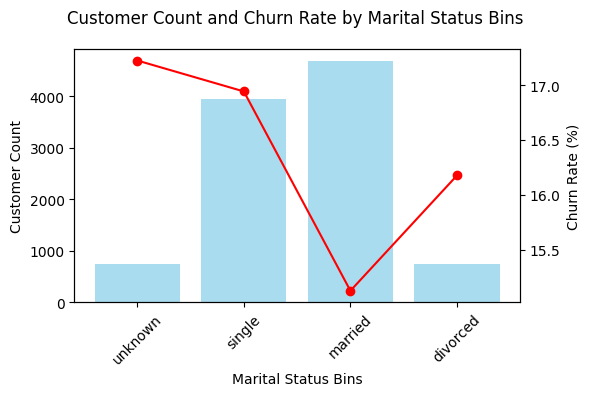

In [11]:
column = 'marital_status'
title = 'Marital Status'
group_name = 'marital_status'


# bins = [25,30,35,40,45,50,55,60,65,70,75]
# labels = ['Late 20s','Early 30s','Late 30s','Early 40s','Late 40s','Early 50s','Late 50s','Early 60s','Late 60s','Early 70s']
# df[f'{column}_bins'] = pd.cut(df[column],bins=bins,labels=labels,right=False)
order = ['unknown','single','married','divorced']

churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=column)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title} Bins')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Churn rate across Income Categories

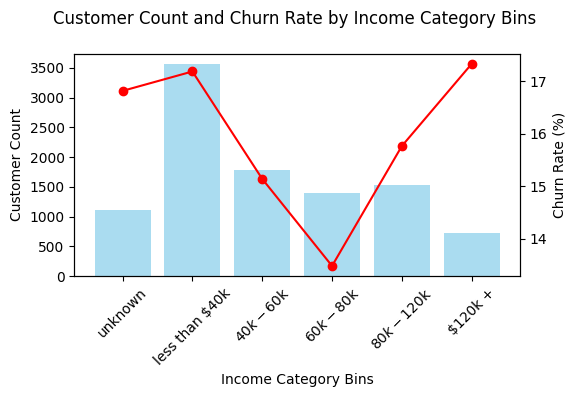

In [12]:
column = 'income_category'
title = 'Income Category'
group_name = 'income_category'


# bins = [25,30,35,40,45,50,55,60,65,70,75]
# labels = ['Late 20s','Early 30s','Late 30s','Early 40s','Late 40s','Early 50s','Late 50s','Early 60s','Late 60s','Early 70s']
# df[f'{column}_bins'] = pd.cut(df[column],bins=bins,labels=labels,right=False)
order = ['unknown', 'less than $40k', '$40k - $60k', '$60k - $80k', '$80k - $120k', '$120k +']

churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=column)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title} Bins')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Card Categories

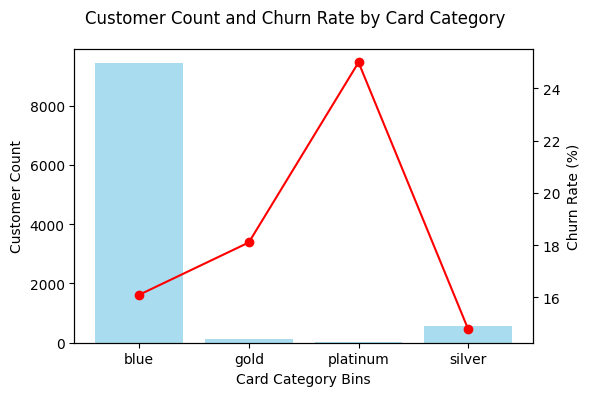

In [13]:
column = 'card_category'
title = 'Card Category'
group_name = 'card_category'


churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
# churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=column)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
# ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title}')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Months on Book vs Churn Rate

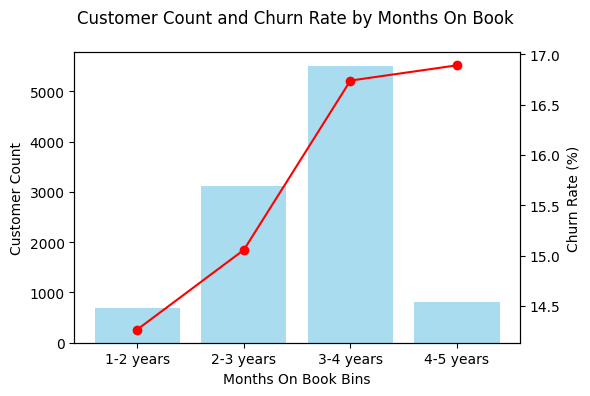

In [14]:
column = 'months_on_book'
title = 'Months On Book'
bin_column_name = 'month_bins'
group_name = 'month_bins'


bins = [12,24,36,48,60]
labels = ['1-2 years','2-3 years','3-4 years','4-5 years']
df[bin_column_name] = pd.cut(df[column],bins=bins,labels=labels,right=False)
# order = ['unknown', 'less than $40k', '$40k - $60k', '$60k - $80k', '$80k - $120k', '$120k +']

churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
# churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=group_name)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
# ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title}')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Total relationship count

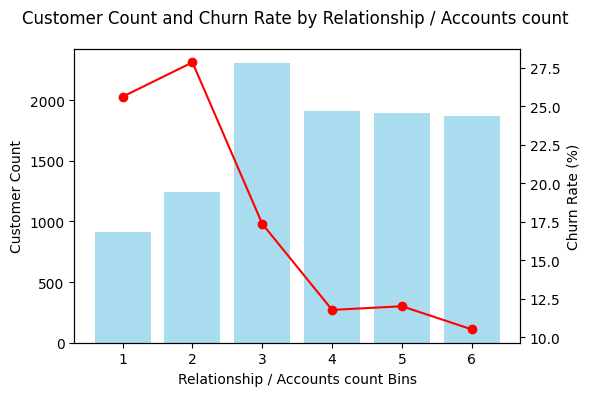

In [15]:
column = 'total_relationship_count'
title = 'Relationship / Accounts count'
# bin_column_name = 'month_bins'
group_name = 'total_relationship_count'


# bins = [12,24,36,48,60]
# labels = ['1-2 years','2-3 years','3-4 years','4-5 years']
# df[bin_column_name] = pd.cut(df[column],bins=bins,labels=labels,right=False)
# order = ['unknown', 'less than $40k', '$40k - $60k', '$60k - $80k', '$80k - $120k', '$120k +']

churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
# churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=group_name)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
# ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title}')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Months Inactive in last year

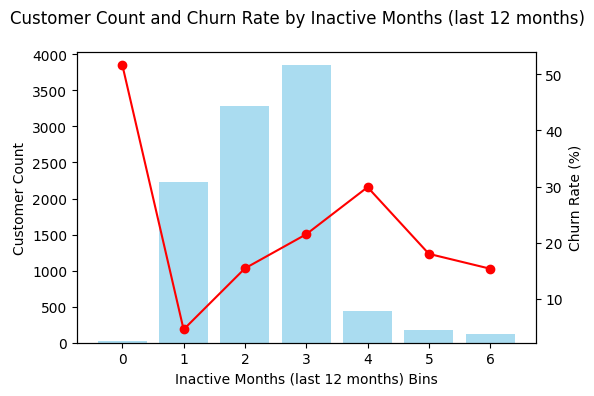

In [16]:
column = 'inactive_months'
title = 'Inactive Months (last 12 months)'
bin_column_name = 'inactive_months'
group_name = 'inactive_months'


# bins = [12,24,36,48,60]
# labels = ['1-2 years','2-3 years','3-4 years','4-5 years']
# df[bin_column_name] = pd.cut(df[column],bins=bins,labels=labels,right=False)
# order = ['unknown', 'less than $40k', '$40k - $60k', '$60k - $80k', '$80k - $120k', '$120k +']

churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
# churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=group_name)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
# ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title}')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Complaints in last year

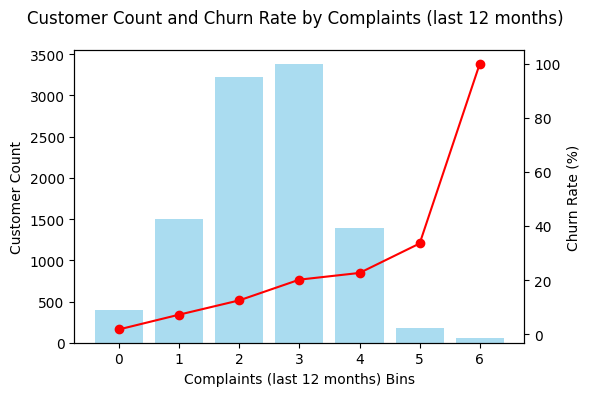

In [17]:
column = 'complaints'
title = 'Complaints (last 12 months)'
bin_column_name = 'complaints'
group_name = 'complaints'


# bins = [12,24,36,48,60]
# labels = ['1-2 years','2-3 years','3-4 years','4-5 years']
# df[bin_column_name] = pd.cut(df[column],bins=bins,labels=labels,right=False)
# order = ['unknown', 'less than $40k', '$40k - $60k', '$60k - $80k', '$80k - $120k', '$120k +']

churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
# churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=group_name)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
# ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title}')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Credit Limit

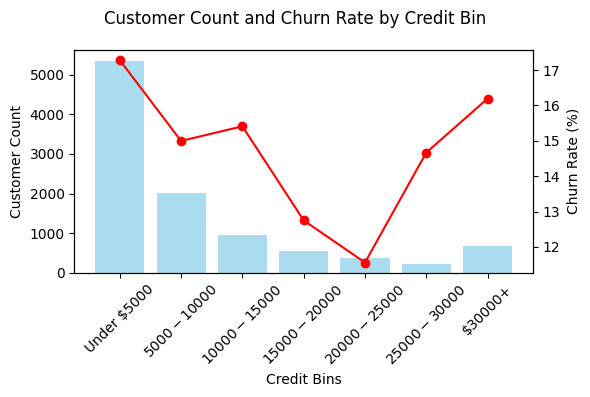

In [18]:
credit_bins = [0,5000,10000,15000,20000,25000,30000,100000]
labels = ['Under $5000', '$5000 - $10000','$10000 - $15000','$15000 - $20000','$20000 - $25000','$25000 - $30000','$30000+']
df['credit_bins'] = pd.cut(df['credit_limit'],bins=credit_bins,labels=labels)

credit_counts = df['credit_bins'].value_counts()
credit_churn = (df.groupby('credit_bins',observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
credit_churn = credit_churn.join(credit_counts, on='credit_bins')

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(credit_churn['credit_bins'], credit_churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel('Credit Bins')
ax1.set_ylabel('Customer Count')
ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(credit_churn['credit_bins'], credit_churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle('Customer Count and Churn Rate by Credit Bin')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Revolving Balance today or at time of closure

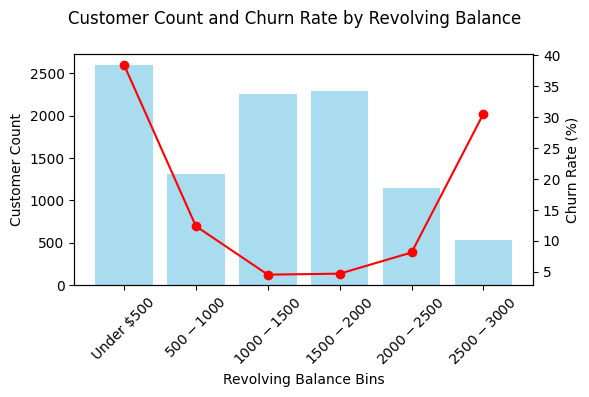

In [19]:
column = 'revolving_bal'
title = 'Revolving Balance'
bin_column_name = 'revolving_bal_bins'
group_name = 'revolving_bal_bins'


bins = [0,500,1000,1500,2000,2500,3000]
labels = ['Under $500','$500-$1000','$1000-$1500','$1500-$2000','$2000-$2500','$2500-$3000']
df[bin_column_name] = pd.cut(df[column],bins=bins,labels=labels,right=False)
# order = ['unknown', 'less than $40k', '$40k - $60k', '$60k - $80k', '$80k - $120k', '$120k +']

churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
# churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=group_name)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title}')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Avg Credit remaining on card in last 12 years

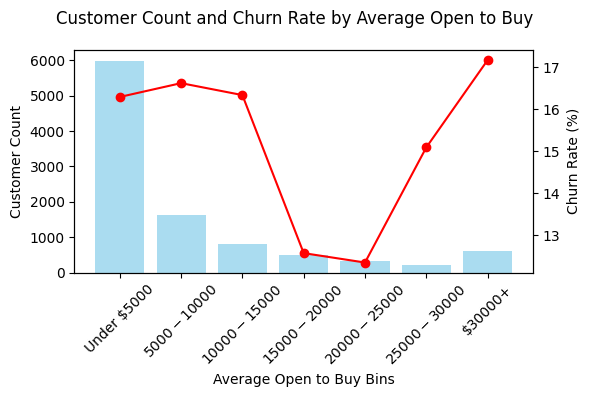

In [20]:
column = 'avg_credit_remaining'
title = 'Average Open to Buy'
bin_column_name = 'avg_credit_bins'
group_name = 'avg_credit_bins'


bins = [0,5000,10000,15000,20000,25000,30000,100000]
labels = ['Under $5000', '$5000 - $10000','$10000 - $15000','$15000 - $20000','$20000 - $25000','$25000 - $30000','$30000+']
df[bin_column_name] = pd.cut(df[column],bins=bins,labels=labels,right=False)
# order = ['unknown', 'less than $40k', '$40k - $60k', '$60k - $80k', '$80k - $120k', '$120k +']

churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
# churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=group_name)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title}')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Spending Amount Change in q4 from q1

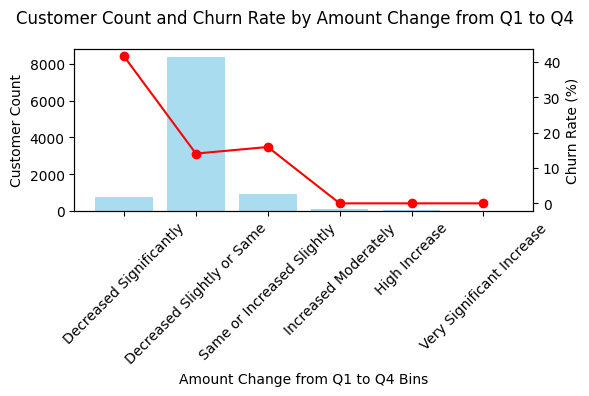

In [21]:
column = 'amount_change'
title = 'Amount Change from Q1 to Q4'
bin_column_name = 'amount_change_bins'
group_name = 'amount_change_bins'


bins = [0,.5,1,1.5,2,2.5,3]
labels = ['Decreased Significantly','Decreased Slightly or Same','Same or Increased Slightly','Increased Moderately','High Increase','Very Significant Increase']
df[bin_column_name] = pd.cut(df[column],bins=bins,labels = labels,right=False)
# order = ['unknown', 'less than $40k', '$40k - $60k', '$60k - $80k', '$80k - $120k', '$120k +']

churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
# churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=group_name)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title}')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Total transaction amount last year

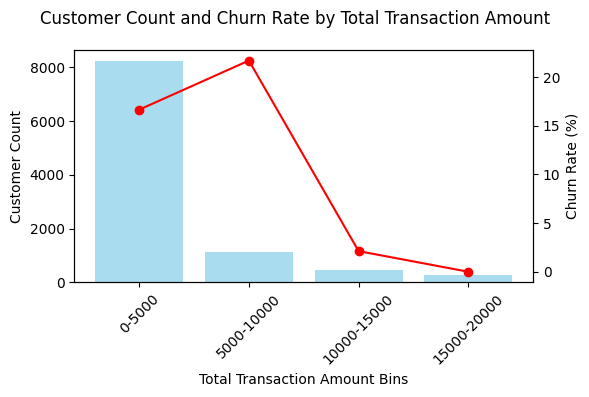

In [22]:
column = 'total_trans_amt'
title = 'Total Transaction Amount'
bin_column_name = 'total_trans_amt_bins'
group_name = 'total_trans_amt_bins'


bins = [0,5000,10000,15000,20000]
labels = ['0-5000','5000-10000','10000-15000','15000-20000']
df[bin_column_name] = pd.cut(df[column],bins=bins,labels = labels,right=False)
# order = ['unknown', 'less than $40k', '$40k - $60k', '$60k - $80k', '$80k - $120k', '$120k +']

churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
# churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=group_name)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title}')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Total number of transactions last year

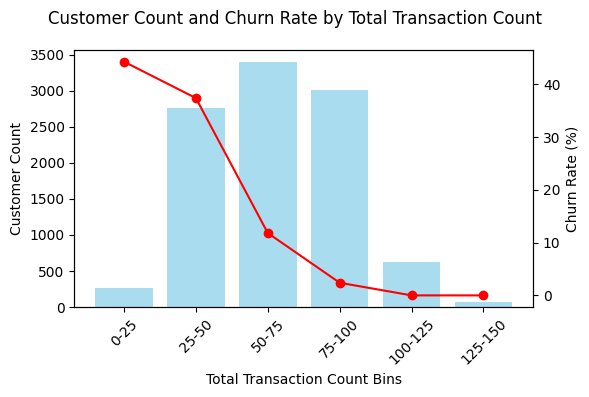

In [23]:
column = 'total_trans_ct'
title = 'Total Transaction Count'
bin_column_name = 'total_trans_ct_bins'
group_name = 'total_trans_ct_bins'


bins = [0,25,50,75,100,125,150]
labels = ['0-25','25-50','50-75','75-100','100-125','125-150']
df[bin_column_name] = pd.cut(df[column],bins=bins,labels = labels,right=False)
# order = ['unknown', 'less than $40k', '$40k - $60k', '$60k - $80k', '$80k - $120k', '$120k +']

churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
# churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=group_name)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title}')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Change in count of transactions in q4 from q1

In [24]:
df.count_change.describe()

count    10127.000000
mean         0.712222
std          0.238086
min          0.000000
25%          0.582000
50%          0.702000
75%          0.818000
max          3.714000
Name: count_change, dtype: float64

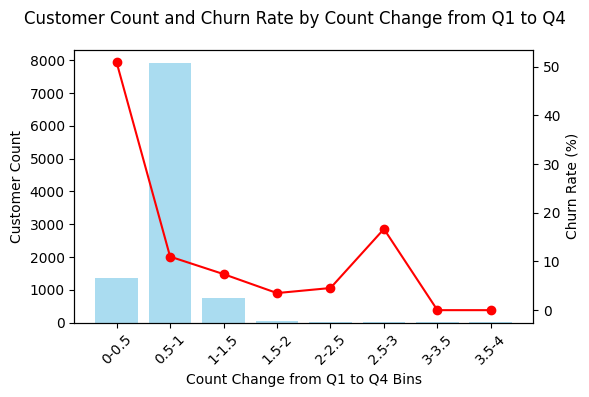

In [25]:
column = 'count_change'
title = 'Count Change from Q1 to Q4'
bin_column_name = 'count_change_bins'
group_name = 'count_change_bins'


bins = [0,.5,1,1.5,2,2.5,3,3.5,4]
labels = ['0-0.5','0.5-1','1-1.5','1.5-2','2-2.5','2.5-3','3-3.5','3.5-4']
df[bin_column_name] = pd.cut(df[column],bins=bins,labels = labels,right=False)
# order = ['unknown', 'less than $40k', '$40k - $60k', '$60k - $80k', '$80k - $120k', '$120k +']

churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
# churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=group_name)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title}')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()

# Average Utilization Ratio last year

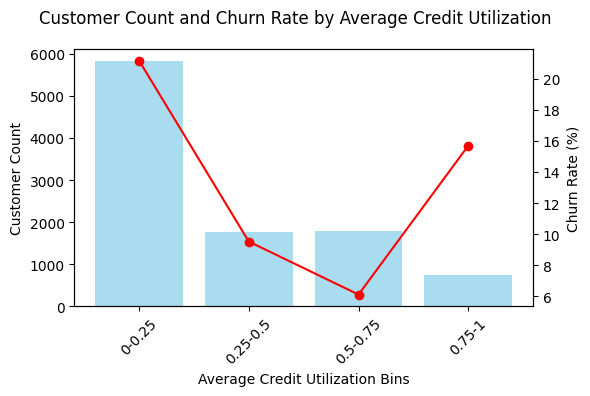

In [26]:
column = 'avg_utilization_ratio'
title = 'Average Credit Utilization'
bin_column_name = 'avg_utilization_ratio_bins'
group_name = 'avg_utilization_ratio_bins'


bins = [0,0.25,0.5,0.75,1]
labels = ['0-0.25','0.25-0.5','0.5-0.75','0.75-1']
df[bin_column_name] = pd.cut(df[column],bins=bins,labels = labels,right=False)
# order = ['unknown', 'less than $40k', '$40k - $60k', '$60k - $80k', '$80k - $120k', '$120k +']

churn = (df.groupby(group_name,observed=False)['attrition_flag'].value_counts(normalize=True).unstack()['attrited customer']*100).reset_index()
# churn[column] = pd.Categorical(churn[column], categories = order, ordered=True)
churn = churn.sort_values(by=group_name)
counts = df[group_name].value_counts().reset_index().sort_values(by=group_name)
churn = churn.merge(counts, on=group_name)
churn

fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(churn[f'{group_name}'], churn['count'], color='skyblue', alpha=0.7, label='Count')
ax1.set_xlabel(f'{title} Bins')
ax1.set_ylabel('Customer Count')
ax1.tick_params(axis='x',rotation=45)

ax2 = ax1.twinx()
ax2.plot(churn[f'{group_name}'], churn['attrited customer'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='y')
fig.suptitle(f'Customer Count and Churn Rate by {title}')
fig.tight_layout()
# fig.legend(loc='upper left')

plt.show()